# データの観察と理解

`population.csv`ファイルと`covid-19_cases.csv`ファイルにはそれぞれ以下のように都道府県ごとの人口（2017年度の数値）と都道府県ごとのcovid-19の感染者数（2021年10月16日時点）のデータが含まれています。

```Python
## population.csvファイル
Prefecture, Population
北海道, 5320000
青森県, 1278000
岩手県, 1255000
...

## covid-19_cases.csvファイル
Prefecture, Cases
北海道, 60570
青森県, 5870
岩手県, 3486
...
```

これらのデータを元に、各都道府県ごとの10万人あたりの感染者数を求め、それらの記述統計（中心傾向、ばらつき、分布など）を分析する。

データソース
- [教育用標準データセット 都道府県別データ](https://www.nstac.go.jp/SSDSE/)
- [NHK 新型コロナウイルス関連データ](https://www3.nhk.or.jp/news/special/coronavirus/data/)

In [35]:
import pandas as pd

print(pd.__version__)

0.25.1


In [ ]:
# Colaboratoryでは以下を実行して必要なファイルをダウンロード
!wget https://raw.githubusercontent.com/UTDataMining/2021S/master/ex3/population.csv

In [ ]:
# Colaboratoryでは以下を実行して必要なファイルをダウンロード
!wget https://raw.githubusercontent.com/UTDataMining/2021S/master/ex3/covid-19_cases.csv

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib 
import seaborn as sns

In [8]:
df1 = pd.read_csv('population.csv')
df2 = pd.read_csv('covid-19_cases.csv')
covid = pd.merge(df1, df2, on='Prefecture')
covid.head(10)

,Prefecture,Population,Cases
0,北海道,5320000,60570
1,青森県,1278000,5870
2,岩手県,1255000,3486
3,宮城県,2323000,16252
4,秋田県,996000,1894
5,山形県,1102000,3528
6,福島県,1882000,9476
7,茨城県,2892000,24351
8,栃木県,1957000,15418
9,群馬県,1960000,16694


In [9]:
# 都道府県別10万人あたりの感染者数
covid['Rate'] = covid['Cases']*100000/covid['Population']
covid.sort_values('Rate', ascending=False).head(10)

,Prefecture,Population,Cases,Rate
46,沖縄県,1443000,50036,3467.498267
12,東京都,13724000,377159,2748.171087
26,大阪府,8823000,201684,2285.889153
13,神奈川県,9159000,168654,1841.401900
11,千葉県,6246000,100154,1603.490234
10,埼玉県,7310000,115416,1578.878249
39,福岡県,5107000,74292,1454.709223
27,兵庫県,5503000,78128,1419.734690
22,愛知県,7525000,106326,1412.970100
25,京都府,2599000,35788,1376.991150


In [16]:
# 棒グラフ
covid.plot.bar(x='Prefecture', y='Rate', figsize=(10,5));

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

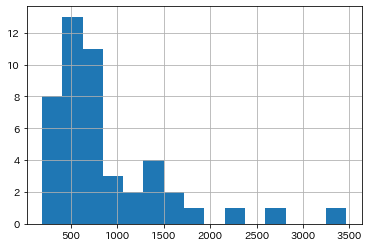

In [14]:
# ヒストグラム
covid['Rate'].hist(bins=15);

In [17]:
# 記述統計
covid['Rate'].describe()

count      47.000000
mean      882.637753
std       661.987283
min       190.160643
25%       453.511481
50%       704.733010
75%      1034.182256
max      3467.498267
Name: Rate, dtype: float64

In [18]:
#平均値, 中央値, 偏差, 最小, 最大
print(covid['Rate'].mean(),covid['Rate'].median(), covid['Rate'].std(), covid['Rate'].min(), covid['Rate'].max())

882.637753497031 704.7330097087379 661.9872832331431 190.1606425702811 3467.4982674982675


In [19]:
# 箱ヒゲ図
covid['Rate'].plot.box();

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [20]:
# 歪度と尖度
print(covid['Rate'].skew(), covid['Rate'].kurt())

2.0638509127437024 4.996532919601765


In [21]:
# 分布のカーネル密度推定
covid['Rate'].plot.kde();

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [22]:
# ヒストグラムと分布
covid["Rate"].plot(kind="hist", bins=10)
covid["Rate"].plot(kind="kde", secondary_y=True);

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

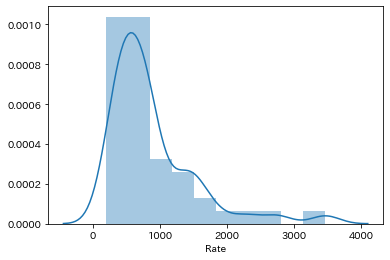

In [23]:
# ヒストグラムと分布
sns.distplot(covid['Rate'], bins=10);

In [24]:
# 相関係数
covid.corr()

,Population,Cases,Rate
Population,1.000000,0.952960,0.704661
Cases,0.952960,1.000000,0.754458
Rate,0.704661,0.754458,1.000000


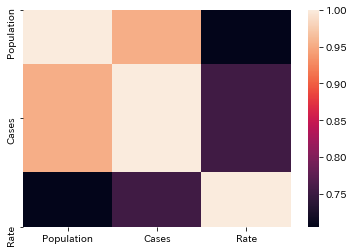

In [25]:
# ヒートマップ
sns.heatmap(data=covid.corr());

In [26]:
# 散布図
covid.plot.scatter(x='Population', y='Rate');

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

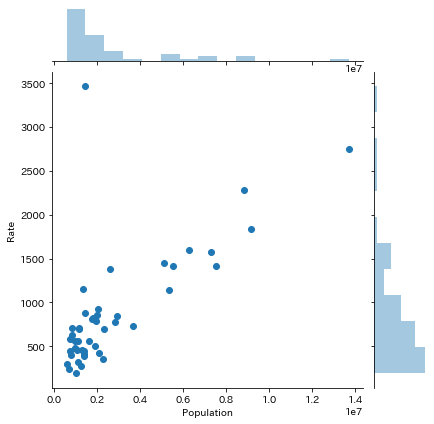

In [27]:
# 散布図
sns.jointplot(x='Population', y='Rate', data=covid);

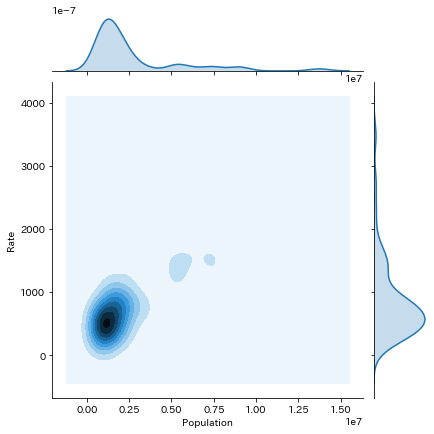

In [28]:
# カーネル密度推定
sns.jointplot(x='Population', y='Rate', data=covid, kind='kde');

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

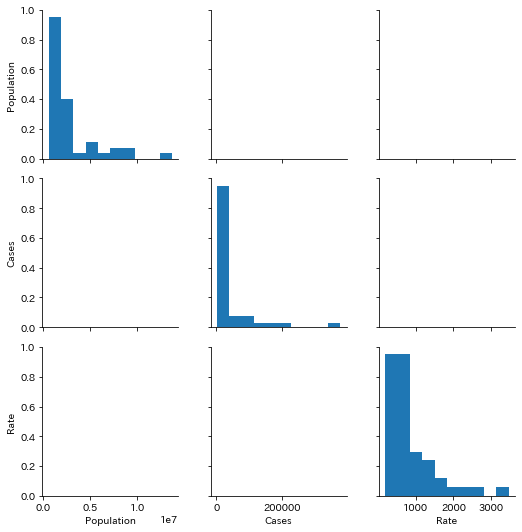

In [29]:
# 散布図
sns.pairplot(data=covid);

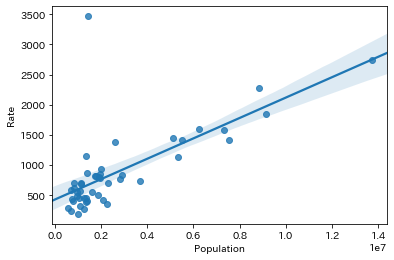

In [30]:
# 回帰直線
sns.regplot(x='Population', y='Rate', data=covid);

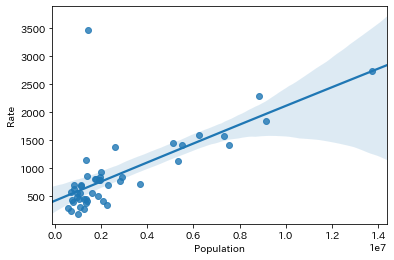

In [31]:
# 回帰曲線（2次の多項式）
sns.regplot(x='Population', y='Rate', data=covid, order=2);

In [32]:
# 都道府県の色分け
covid.loc[covid['Rate'] >= covid['Rate'].quantile(.75), 'color']='red'
covid.loc[(covid['Rate'] < covid['Rate'].quantile(.75)) & (covid['Rate'] >= covid['Rate'].quantile(.25)), 'color']='blue'
covid.loc[(covid['Rate'] < covid['Rate'].quantile(.25)), 'color']='green'
covid.head()

,Prefecture,Population,Cases,Rate,color
0,北海道,5320000,60570,1138.533835,red
1,青森県,1278000,5870,459.311424,blue
2,岩手県,1255000,3486,277.768924,green
3,宮城県,2323000,16252,699.612570,blue
4,秋田県,996000,1894,190.160643,green


In [33]:
#!pip install japanmap

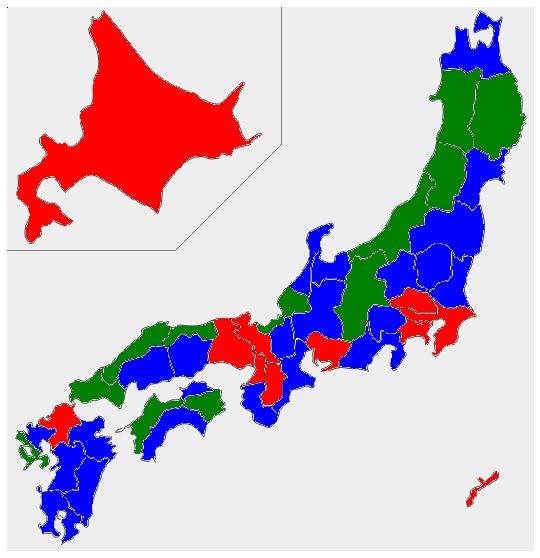

In [34]:
# 地図の可視化
import japanmap as jm
pref_colors={p:c for p, c in zip(covid['Prefecture'].values, covid['color'].values)}
image=jm.picture(pref_colors)
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off');